In [1]:
import sqlite3

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
conn = sqlite3.connect('test.db')

In [22]:
def executeSql(sql):
    cursor = conn.cursor()
    cursor.execute(sql)
    row = cursor.fetchone()
    while row:
        print(row)
        row = cursor.fetchone()
    cursor.close()

In [23]:
def executeSqls(sql):
    cursor = conn.cursor()
    cursor.executescript(sql)
    row = cursor.fetchone()
    while row:
        print(row)
        row = cursor.fetchone()
    cursor.close()

In [13]:
createsql = '''
    create table Customers(
        Id int AUTO_INCREMENT primary key,
        FirstName varchar(40) not null,
        LastName varchar(40) not null,
        city varchar(40),
        country varchar(40),
        phone varchar(20)
    );
    
    create table Suppliers(
        Id int AUTO_INCREMENT primary key,
        CompanyName varchar(40) not null,
        ContactName varchar(50) not null,
        ContactTitle varchar(40),
        City varchar(40),
        Country varchar(40),
        Phone varchar(30),
        Fax varchar(30)
    );
    
    create table Products(
        Id int AUTO_INCREMENT primary key,
        ProductName varchar(50) not null,
        SupplierId int not null,
        UnitPrice decimal,
        Package varchar(30),
        IsDiscontinued bit,
        CONSTRAINT FK_SupplierId FOREIGN KEY (SupplierId) REFERENCES Suppliers(id)
    );
    
    create table Orders(
        Id int AUTO_INCREMENT primary key,
        OrderDate DateTime not null,
        OrderNumber varchar(10) not null,
        CustomerId int not null,
        TotalAmount decimal,
        CONSTRAINT FK_CustomerID FOREIGN KEY (CustomerId) REFERENCES Customers(id)
    );
    
    create table OrderItems(
        Id int AUTO_INCREMENT primary key,
        OrderId int not null,
        ProductId int not null,
        UnitPrice decimal,
        Quantity int,
        CONSTRAINT FK_OrderId FOREIGN KEY (OrderId) REFERENCES Orders(id),
        CONSTRAINT FK_ProductId FOREIGN KEY (ProductId) REFERENCES Products(id)
    );
'''

executeSqls(createsql)

In [31]:
examples = [(2156,830,77,13.00,2), (2157,830,75,7.75,4), (2158,830,73,15.00,2)]
cursor = conn.cursor()
cursor.executemany("INSERT INTO OrderItems (Id,OrderId,ProductId,UnitPrice,Quantity) VALUES(?,?,?,?,?);", examples)

In [33]:
sql1 = "select * from OrderItems order by 1 desc limit 5 "
executeSql(sql1)

(2158, 830, 73, 15, 2)
(2157, 830, 75, 7.75, 4)
(2156, 830, 77, 13, 2)
(2155, 830, 77, 13, 2)
(2154, 830, 75, 7.75, 4)


In [24]:
sql3 = "select * from suppliers limit 5"
executeSql(sql3)

(1, 'Exotic Liquids', 'Charlotte Cooper', None, 'London', 'UK', '(171) 555-2222', None)
(2, 'New Orleans Ca6/Delights', 'Shelley Burke', None, 'New Orleans', 'USA', '(100) 555-4822', None)
(3, "Grandma Kelly's Homestead", 'Regina Murphy', None, 'Ann Arbor', 'USA', '(313) 555-5735', '(313) 555-3349')
(4, 'Tokyo Traders', 'Yoshi Nagase', None, 'Tokyo', 'Japan', '(03) 3555-5011', None)
(5, "Cooperativa de Quesos 'Las Cabras'", 'Antonio del Valle Saavedra', None, 'Oviedo', 'Spain', '(98) 598 76 54', None)


In [27]:
df = pd.read_sql_query("select * from suppliers", conn)
df

,Id,CompanyName,ContactName,ContactTitle,City,Country,Phone,Fax
0,1,Exotic Liquids,Charlotte Cooper,None,London,UK,(171) 555-2222,None
1,2,New Orleans Ca6/Delights,Shelley Burke,None,New Orleans,USA,(100) 555-4822,None
2,3,Grandma Kelly's Homestead,Regina Murphy,None,Ann Arbor,USA,(313) 555-5735,(313) 555-3349
3,4,Tokyo Traders,Yoshi Nagase,None,Tokyo,Japan,(03) 3555-5011,None
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,None,Oviedo,Spain,(98) 598 76 54,None
5,6,Mayumi's,Mayumi Ohno,None,Osaka,Japan,(06) 431-7877,None
6,7,"Pavlova, Ltd.",Ian Devling,None,Melbourne,Australia,(03) 444-2343,(03) 444-6588
7,8,"Specialty Biscuits, Ltd.",Peter Wilson,None,Manchester,UK,(161) 555-4448,None
8,9,PB Knäckebröd AB,Lars Peterson,None,Göteborg,Sweden,031-987 65 43,031-987 65 91
9,10,Refrescos Americanas LTDA,Carlos Diaz,None,Sao Paulo,Brazil,(11) 555 4640,None


In [28]:
sql4 = "select * from products where unitprice between 30 and 60"
products = pd.read_sql_query(sql4, conn)
products

,Id,ProductName,SupplierId,UnitPrice,Package,IsDiscontinued
0,7,Uncle Bob's Organic Dried Pears,3,30.00,12 - 1 lb pkgs.,0
1,8,Northwoods Cranberry Sauce,3,40.00,12 - 12 oz jars,0
2,10,Ikura,4,31.00,12 - 200 ml jars,0
3,12,Queso Manchego La Pastora,5,38.00,10 - 500 g pkgs.,0
4,17,Alice Mutton,7,39.00,20 - 1 kg tins,1
5,26,Gumbär Gummibärchen,11,31.23,100 - 250 g bags,0
6,27,Schoggi Schokolade,11,43.90,100 - 100 g pieces,0
7,28,Rössle Sauerkraut,12,45.60,25 - 825 g cans,1
8,32,Mascarpone Fabioli,14,32.00,24 - 200 g pkgs.,0
9,43,Ipoh Coffee,20,46.00,16 - 500 g tins,0


[Text(0.5, 0, '')]

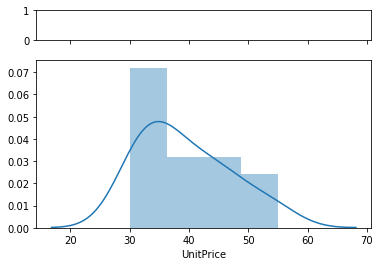

In [29]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.distplot(products["UnitPrice"], ax = ax_hist)
ax_box.set(xlabel='')